In [8]:
import matplotlib.pyplot as plt

color_codes = [
    "#354e97",  # 深蓝色
    "#70a3c4",  # 浅蓝色
    "#c7e5ec",  # 浅蓝色
    "#f5b46f",  # 浅橙色
    "#df5b3f"   # 红色
]

colors = [
    # "#354e97",  # 深蓝色
    "#70a3c4",  # 浅蓝色
    # "#c7e5ec",  # 浅蓝色
    # "#f5b46f",  # 浅橙色
    "#df5b3f"   # 红色
]

def plot_fid_vs_steps(steps_list, fid_values_list, labels, color_map='tab10', marker='o', 
    plot_name='FID10K vs Training Step', save_path='fid_vs_step.png', is_ax_inset=True,
    ylabel='FID10K', size=(10,6),
    color_codes_begins=0,
    color_codes_end=5,
    color_codes_reverse=False,
    colors=colors,
    ncol=1
    ):
    """
    绘制 FID 随训练步数变化的学术风格图表，支持多组数据。

    参数:
        steps_list (list of lists): 多组 FID 值列表。
        fid_values_list (list of lists): 多组训练步数列表（单位：K）。
        labels (list): 每组数据的标签。
        color_map (str): 使用的色卡名称，默认为 'tab10'。
        marker (str): 统一使用的标记样式，默认为 'o'。
        save_path (str): 图表保存路径，默认为 'fid_vs_step.png'。
    """
    # 创建图表

    plt.rcParams['font.family'] = 'DejaVu Sans'  # 使用默认衬线字体
    plt.rcParams['font.size'] = 16
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['legend.fontsize'] = 12
    plt.rcParams['figure.dpi'] = 300

    plt.figure(figsize=size)

    # 获取色卡
    colors = colors[color_codes_begins:color_codes_end]
    if color_codes_reverse:
        colors = colors[::-1]


    # 绘制每组数据的曲线
    for i, (steps, fid_values, label) in enumerate(zip(steps_list, fid_values_list, labels)):
        color = colors[i % len(colors)]  # 循环使用色卡中的颜色
        plt.plot(steps, fid_values, marker=marker, linestyle='-', color=color, label=label)

    # 设置标题和标签
    # plt.title(plot_name, fontsize=16, fontweight='bold')
    plt.xlabel('Training Step (K)', fontsize=20)
    plt.ylabel(ylabel, fontsize=20)

    # 设置网格线（灰色）和背景（灰色）
    plt.gca().set_facecolor('#f5f5f5')  # 使用更淡的灰色作为背景颜色
    plt.grid(True, linestyle='--', alpha=0.2, color='gray')  # 网格线为灰色

    # 去掉边框
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # 设置坐标轴范围
    all_steps = [step for steps in steps_list for step in steps]
    all_fid_values = [fid for fid_values in fid_values_list for fid in fid_values]
    plt.ylim(min(all_fid_values) - 1, max(all_fid_values) + 1)
    # plt.xlim(min(all_steps) - 1, max(all_steps) + 1)
    plt.xlim(0, max(all_steps) + 40)

    # 设置横轴和纵轴刻度字体大小
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    # 添加图例
    plt.legend(fontsize=16, loc='best')

    if is_ax_inset:
        # 创建子图（放大图），缩小子图大小
        ax_inset = plt.axes([0.5, 0.4, 0.25, 0.25])  # 子图位置和大小 [left, bottom, width, height]

        # 提取子图部分的数据（step 500～700）
        subplot_fid_values = []
        for i, (steps, fid_values) in enumerate(zip(steps_list, fid_values_list)):
            sub_steps = []
            sub_fid_values = []
            for step, fid in zip(steps, fid_values):
                if 500 <= step <= 700:  # 只保留 step 500～700 的数据
                    sub_steps.append(step)
                    sub_fid_values.append(fid)
            subplot_fid_values.extend(sub_fid_values)  # 收集所有子图部分的 FID 值
            color = colors[i % len(colors)]
            ax_inset.plot(sub_steps, sub_fid_values, marker=marker, linestyle='-', color=color, label=labels[i])

        # 设置子图的范围为 step 500～700，并根据子图部分的 FID 值动态设置 ylim
        ax_inset.set_xlim(500, 800)
        if subplot_fid_values:  # 如果子图部分有数据
            y_min = min(subplot_fid_values) - 1
            y_max = max(subplot_fid_values) + 1
            ax_inset.set_ylim(y_min, y_max)

        # 设置子图的网格线和背景
        ax_inset.set_facecolor('#f5f5f5')
        ax_inset.grid(True, linestyle='--', alpha=0.2, color='gray')

        # 设置子图的刻度字体大小
        ax_inset.tick_params(axis='both', labelsize=6)  # 缩小刻度字体大小以适应更小的子图

    # 保存图表，确保边缘不留空白
    plt.savefig(save_path, dpi=300, bbox_inches='tight', pad_inches=0)
    # 显示图表
    plt.show()
    
def format_data(Data, begin=1, name='FID10K'):
    """
    格式化数据为绘图所需的格式。

    参数:
        Data (list): FID 数据列表。
        begin (int): 起始步数的倍数（默认从 1 开始）。
        name (str): 数据标签名称。

    返回:
        dict: 包含数据、步数和名称的字典。
    """
    DataSteps = [i * 100 for i in range(begin, len(Data) + begin)]  # 生成步数列表
    return {
        'Data': Data,
        'DataSteps': DataSteps,
        'Name': name
    }


In [39]:
import matplotlib.pyplot as plt
import numpy as np

color_codes = ["#354e97", "#70a3c4", "#c7e5ec", "#f5b46f", "#df5b3f"]
colors = [
    "#70a3c4",  # 浅蓝色
    "#354e97",  # 深蓝色
    # "#c7e5ec",  # 浅蓝色
    "#f5b46f",  # 浅橙色
    "#df5b3f"   # 红色
]

def plot_fid_vs_steps(steps_list, fid_values_list, labels,
                      color_map='tab10', marker='o',
                      plot_name='FID10K vs Training Step',
                      save_path='fid_vs_step.png', is_ax_inset=True,
                      ylabel='FID10K', size=(10, 6),
                      color_codes_begins=0, color_codes_end=5,
                      color_codes_reverse=False,
                      colors=colors, ncol=1,
                      custom_x_axis=None, uniform_x_axis=False,
                      xscale='log',                       # 'log' 或 'linear'
                      xticks_k=None                       # 新增：list like [100,200,400,1000,3000,7000]
                      ):
    plt.rcParams['font.family'] = 'DejaVu Sans'
    plt.rcParams['font.size'] = 16
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['legend.fontsize'] = 12
    plt.rcParams['figure.dpi'] = 300

    fig = plt.figure(figsize=size)
    ax  = fig.add_subplot(111)

    colors = colors[color_codes_begins:color_codes_end]
    if color_codes_reverse:
        colors = colors[::-1]

    # 决定 x 数据
    if uniform_x_axis:
        x_data_list = [list(range(len(fid_values))) for fid_values in fid_values_list]
        x_label = 'Checkpoint Index'
    elif custom_x_axis is not None:
        x_data_list = custom_x_axis
        x_label = 'Training Step (K)'
    else:
        x_data_list = steps_list
        x_label = 'Training Step (K)'

    # 主图绘制
    for i, (x_data, fid_values, label) in enumerate(zip(x_data_list, fid_values_list, labels)):
        ax.plot(x_data, fid_values, marker=marker, linestyle='-', color=colors[i % len(colors)], label=label)

    ax.set_xlabel(x_label)
    ax.set_ylabel(ylabel)
    ax.set_facecolor('#f5f5f5')
    ax.grid(True, linestyle='--', alpha=0.2, color='gray')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.tick_params(labelsize=16)

    # 关键：自定义刻度
    if xticks_k is not None:
        xticks_num = np.array(xticks_k, dtype=float)   # 保证是浮点
        ax.set_xticks(xticks_num)
        # 格式化 K / M
        ax.set_xticklabels([f'{int(x/1000)}M' if x>=1000 else f'{int(x)}K' for x in xticks_num])
        ax.set_xlim(xticks_num[0], xticks_num[-1])

    if xscale == 'log':
        ax.set_xscale('log')

    # y 范围
    all_fid = [f for fid_vals in fid_values_list for f in fid_vals]
    ax.set_ylim(min(all_fid) - 1, max(all_fid) + 1)
    ax.legend(fontsize=16, loc='best', ncol=ncol)

    # 子图（inset）（略，与之前相同，可保留）
    plt.savefig(save_path, dpi=300, bbox_inches='tight', pad_inches=0)
    plt.show()


def format_data(Data, begin=1, name='FID10K', steps=None,
                log_steps=False, log_min=2, log_max=5, log_num=20):
    if steps is not None:
        DataSteps = steps
    elif log_steps:
        DataSteps = np.logspace(log_min, log_max, log_num).astype(int).tolist()
    else:
        DataSteps = [i * 100 for i in range(begin, len(Data) + begin)]
    return {'Data': Data, 'DataSteps': DataSteps, 'Name': name}

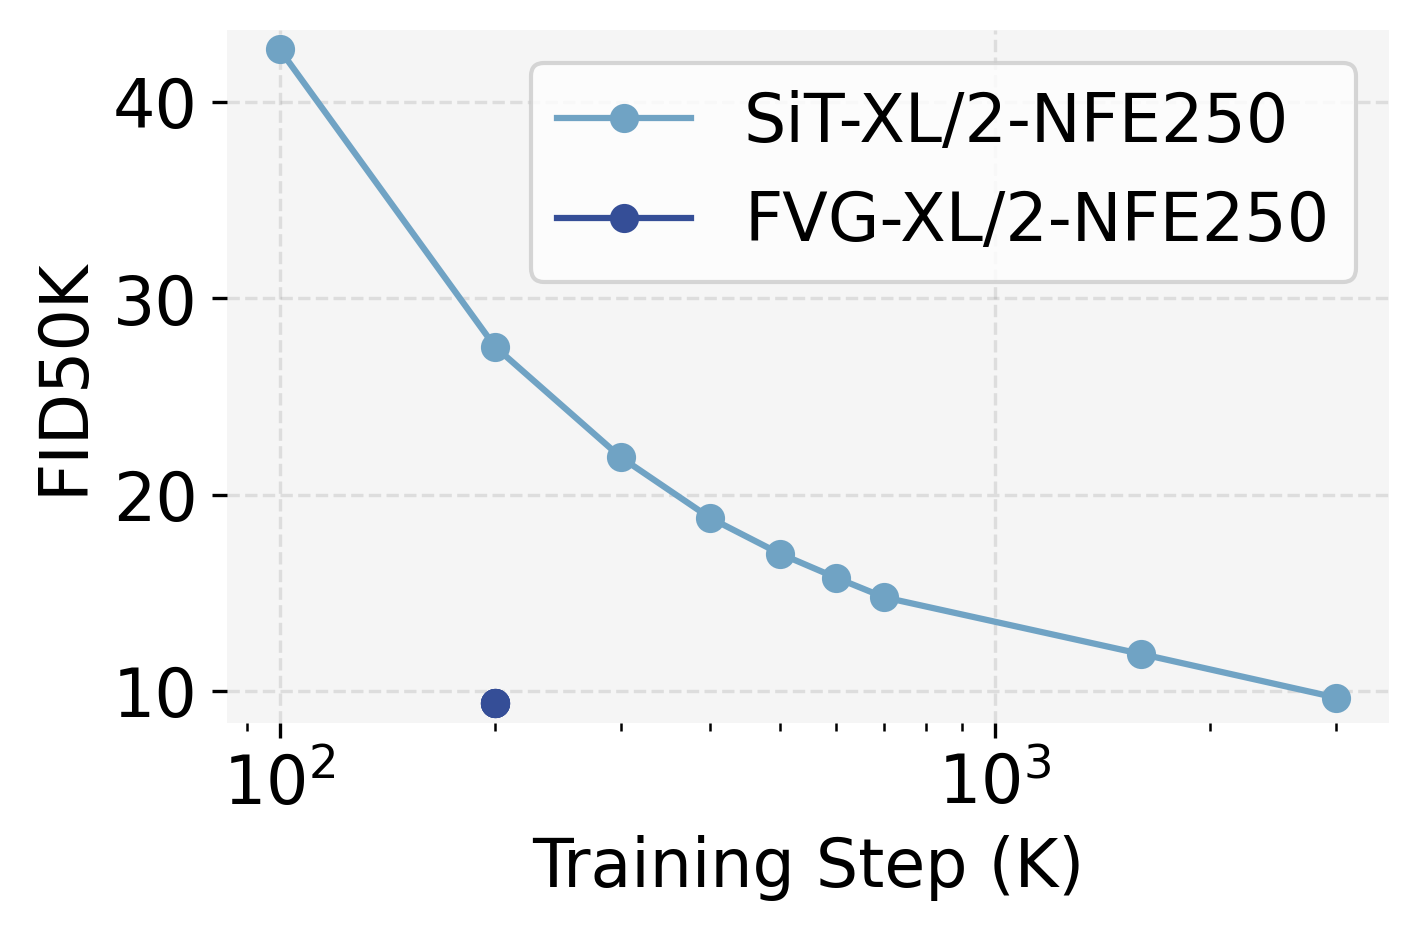

In [40]:
# 示例数据
FVG_XL_2_NFE10_FIDs_Raw = [9.39243287554979, 9.39243287554979, 9.39243287554979, 9.39243287554979]
FVG_XL_2_NFE250_FIDs_Raw = [9.39243287554979, 9.39243287554979, 9.39243287554979, 9.39243287554979]
Flow_DiT_Dense_XL_2_FIDs_Raw = [42.6699256, 27.53129435, 21.89157078, 18.80377009, 16.99634972, 15.76212191, 14.76930538, 11.8853350088734, 9.66107185140533]

# 定义对应的step数据
FVG_XL_2_NFE10_Steps = [200, 200, 200, 200]  # 自定义step数据
Flow_DiT_Dense_XL_2_Steps = [100, 200, 300, 400, 500, 600, 700, 1600, 3000]  # 自定义step数据

FVG_XL_2_NFE10_FIDs = format_data(FVG_XL_2_NFE10_FIDs_Raw, steps=FVG_XL_2_NFE10_Steps, name='FVG-XL/2-NFE250')
Flow_DiT_Dense_XL_2_FIDs = format_data(Flow_DiT_Dense_XL_2_FIDs_Raw, steps=Flow_DiT_Dense_XL_2_Steps, name='SiT-XL/2-NFE250')

Flow_FIDList = [
    Flow_DiT_Dense_XL_2_FIDs, 
    FVG_XL_2_NFE10_FIDs, 
    # Flow_DiT_Dense_L_2_FIDs,
    # Flow_DiT_Dense_XL_2_FIDs
]

# 调用函数绘制图表
plot_fid_vs_steps(
    steps_list=[fids['DataSteps'] for fids in Flow_FIDList],
    fid_values_list=[fids['Data'] for fids in Flow_FIDList],
    labels=[fids['Name'] for fids in Flow_FIDList],  # 每组数据的标签
    # color_map='tab10',  # 使用 'tab10' 色卡
    marker='o',  # 统一使用圆圈标记
    save_path='[Ablation]-1-Num_Experts_Fid_vs_Step.png',
    plot_name='[Ablation] Num Experts: FID50K over Training Step',
    ylabel='FID50K',
    is_ax_inset=False,
    size=(5,3)
)

/tmp/ipykernel_67468/3129921383.py:49: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(x_min - x_range * padding_factor, x_max + x_range * padding_factor)


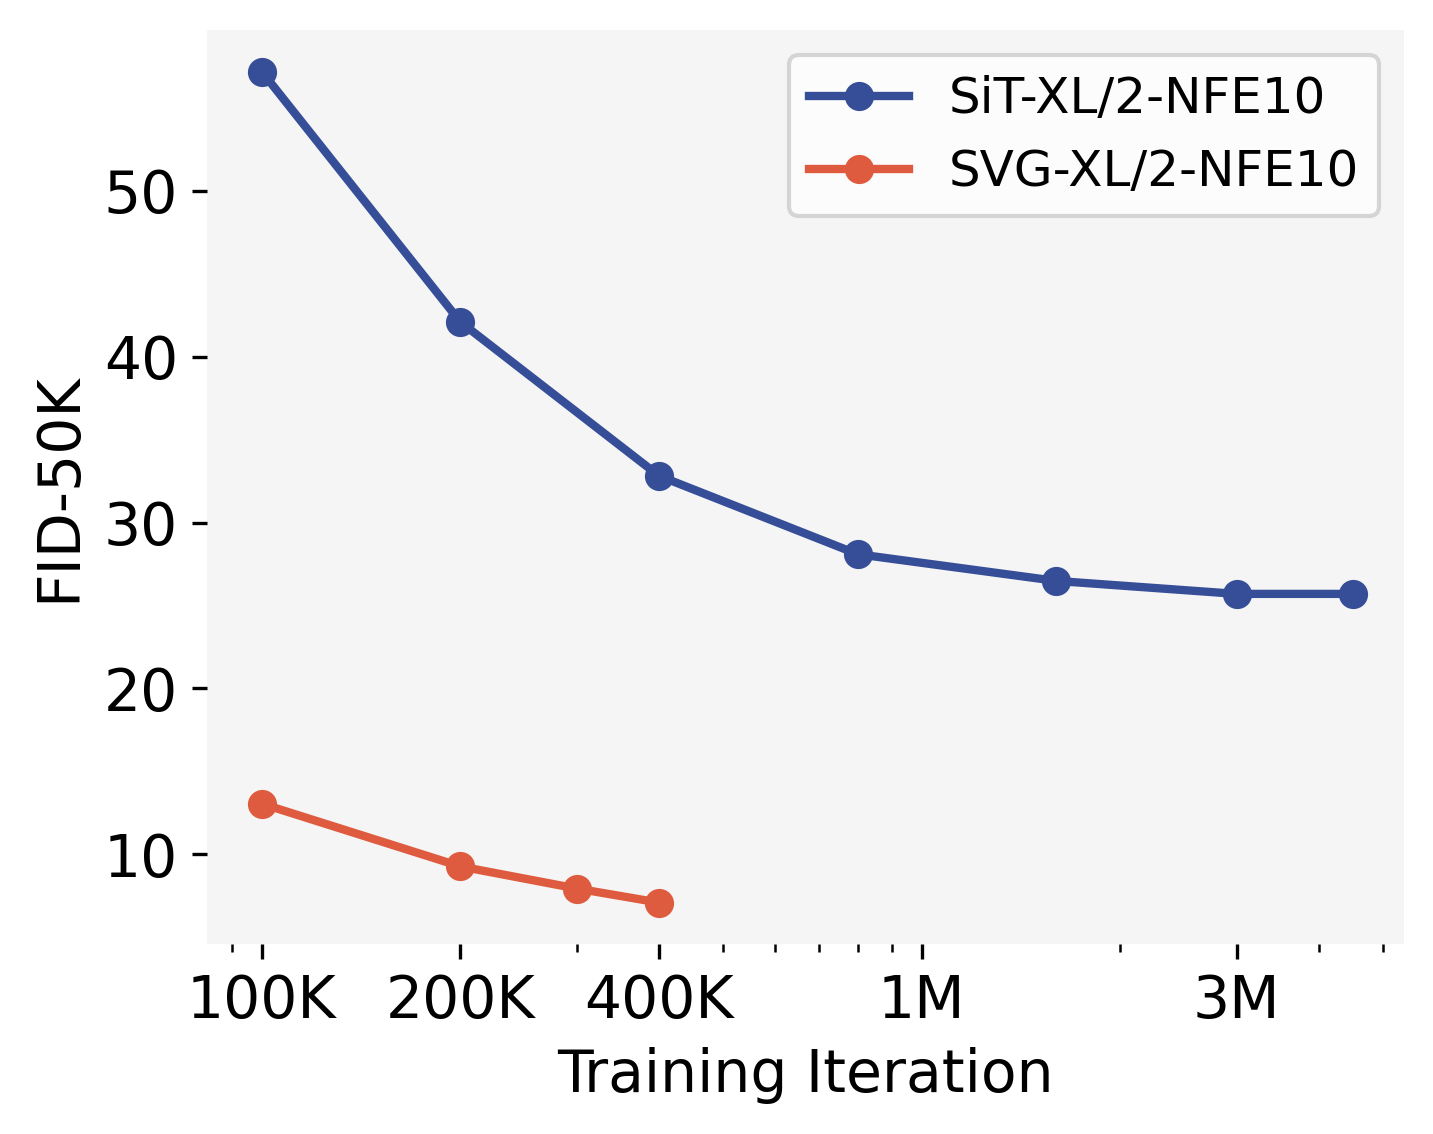

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# ---------- 颜色表 ----------
color_codes = ["#354e97", "#70a3c4", "#c7e5ec", "#f5b46f", "#df5b3f"]
colors = [
    "#354e97",  # 深蓝色
    # "#70a3c4",  # 浅蓝色
    # "#c7e5ec",  # 浅蓝色
    # "#f5b46f",  # 浅橙色
    "#df5b3f"   # 红色
]

# ---------- 绘图函数 ----------
def plot_fid_vs_steps(steps_list, fid_values_list, labels,
                      marker='o', save_path='fid_vs_step.png',
                      plot_name='FID vs Training Step', ylabel='FID',
                      size=(5,3), is_ax_inset=False,
                      xscale='log',                       # 新增
                      xticks_k=[100,200,400,1000,3000,7000]  # 新增
                      ):
    plt.rcParams['font.family'] = 'DejaVu Sans'
    plt.rcParams['font.size'] = 14
    plt.rcParams['axes.labelsize'] = 16
    plt.rcParams['legend.fontsize'] = 12
    plt.rcParams['figure.dpi'] = 300

    fig, ax = plt.subplots(figsize=size)

    # 画图
    for i, (x, y, lab) in enumerate(zip(steps_list, fid_values_list, labels)):
        ax.plot(x, y, marker=marker, lw=2, label=lab,
                color=colors[i % len(colors)])

    # 坐标轴
    ax.set_xlabel('Training Iteration')
    ax.set_ylabel(ylabel)
    ax.set_title(plot_name, fontsize=12)
    ax.set_xscale(xscale)
    ax.set_xticks(xticks_k)
    ax.set_xticklabels([f'{int(v/1000)}M' if v>=1000 else f'{int(v)}K'
                        for v in xticks_k])
    
    # 设置x轴范围，前后多留点空
    x_min = min([min(x) for x in steps_list])
    x_max = max([max(x) for x in steps_list])
    padding_factor = 0.2  # 增加20%的空白
    x_range = x_max - x_min
    ax.set_xlim(x_min - x_range * padding_factor, x_max + x_range * padding_factor)

    # 外观
    ax.set_facecolor('#f5f5f5')
    ax.grid(True, ls='--', alpha=0.0, c='gray')
    for sp in ax.spines.values():
        sp.set_visible(False)
    ax.legend(loc='best')
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()

# ---------- 数据格式化 ----------
def format_data(Data, steps, name='FID'):
    return {'Data': Data, 'DataSteps': steps, 'Name': name}

# ---------- 你的原始数据 ----------

Svg_XL_2_FIDs_NFE10_Raw = [13.06, 9.28, 7.95, 7.10]
Svg_XL_2_NFE10_Steps   = [100, 200, 300, 400]


# Flow_DiT_Dense_XL_2_FIDs_NFE250_Raw = [42.67,27.53,21.89,18.80,17.00,15.76,14.77,11.89,9.66, 8.3]
# Flow_DiT_Dense_XL_2_NFE250_Steps = [100,200,300,400,500,600,700,1600,3000, 7000]

Flow_DiT_Dense_XL_2_FIDs_NFE10_Raw = [57.17,42.08,32.81,28.09,26.48,25.7, 25.7]
Flow_DiT_Dense_XL_2_NFE10_Steps = [100,200,400,800,1600,3000,4500]

# Fvg_XL_2_FIDs_NFE10  = format_data(Fvg_XL_2_FIDs_NFE10_Raw,
                                #    Fvg_XL_2_NFE10_Steps,
                                #    'FVG-XL/2-NFE10')

Svg_XL_2_FIDs_NFE10  = format_data(Svg_XL_2_FIDs_NFE10_Raw,
                                   Svg_XL_2_NFE10_Steps,
                                   'SVG-XL/2-NFE10')

# Flow_DiT_Dense_XL_2_FIDs_NFE250 = format_data(Flow_DiT_Dense_XL_2_FIDs_NFE250_Raw,
                                    #    Flow_DiT_Dense_XL_2_NFE250_Steps,
                                    #    'SiT-XL/2')
Flow_DiT_Dense_XL_2_FIDs_NFE10 = format_data(Flow_DiT_Dense_XL_2_FIDs_NFE10_Raw,
                                       Flow_DiT_Dense_XL_2_NFE10_Steps,
                                       'SiT-XL/2-NFE10')

# Flow_FIDList = [Flow_DiT_Dense_XL_2_FIDs_NFE250, Flow_DiT_Dense_XL_2_FIDs_NFE10, Fvg_XL_2_FIDs_NFE10, Svg_XL_2_FIDs_NFE10]
Flow_FIDList = [
                # Flow_DiT_Dense_XL_2_FIDs_NFE250, 
                Flow_DiT_Dense_XL_2_FIDs_NFE10, 
                # Fvg_XL_2_FIDs_NFE10, 
                Svg_XL_2_FIDs_NFE10
                ]

# ---------- 调用 ----------
plot_fid_vs_steps(
    steps_list=[f['DataSteps'] for f in Flow_FIDList],
    fid_values_list=[f['Data'] for f in Flow_FIDList],
    labels=[f['Name'] for f in Flow_FIDList],
    save_path="NFE10",
    # plot_name='[Ablation] Num Experts: FID50K over Training Step',
    plot_name="",
    ylabel='FID-50K',
    size=(5,4),
    is_ax_inset=False
)

/tmp/ipykernel_90446/1285896255.py:52: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(x_min - x_range * padding_factor, x_max + x_range * padding_factor)
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not found.
findfont: Font family 'SimHei' not foun

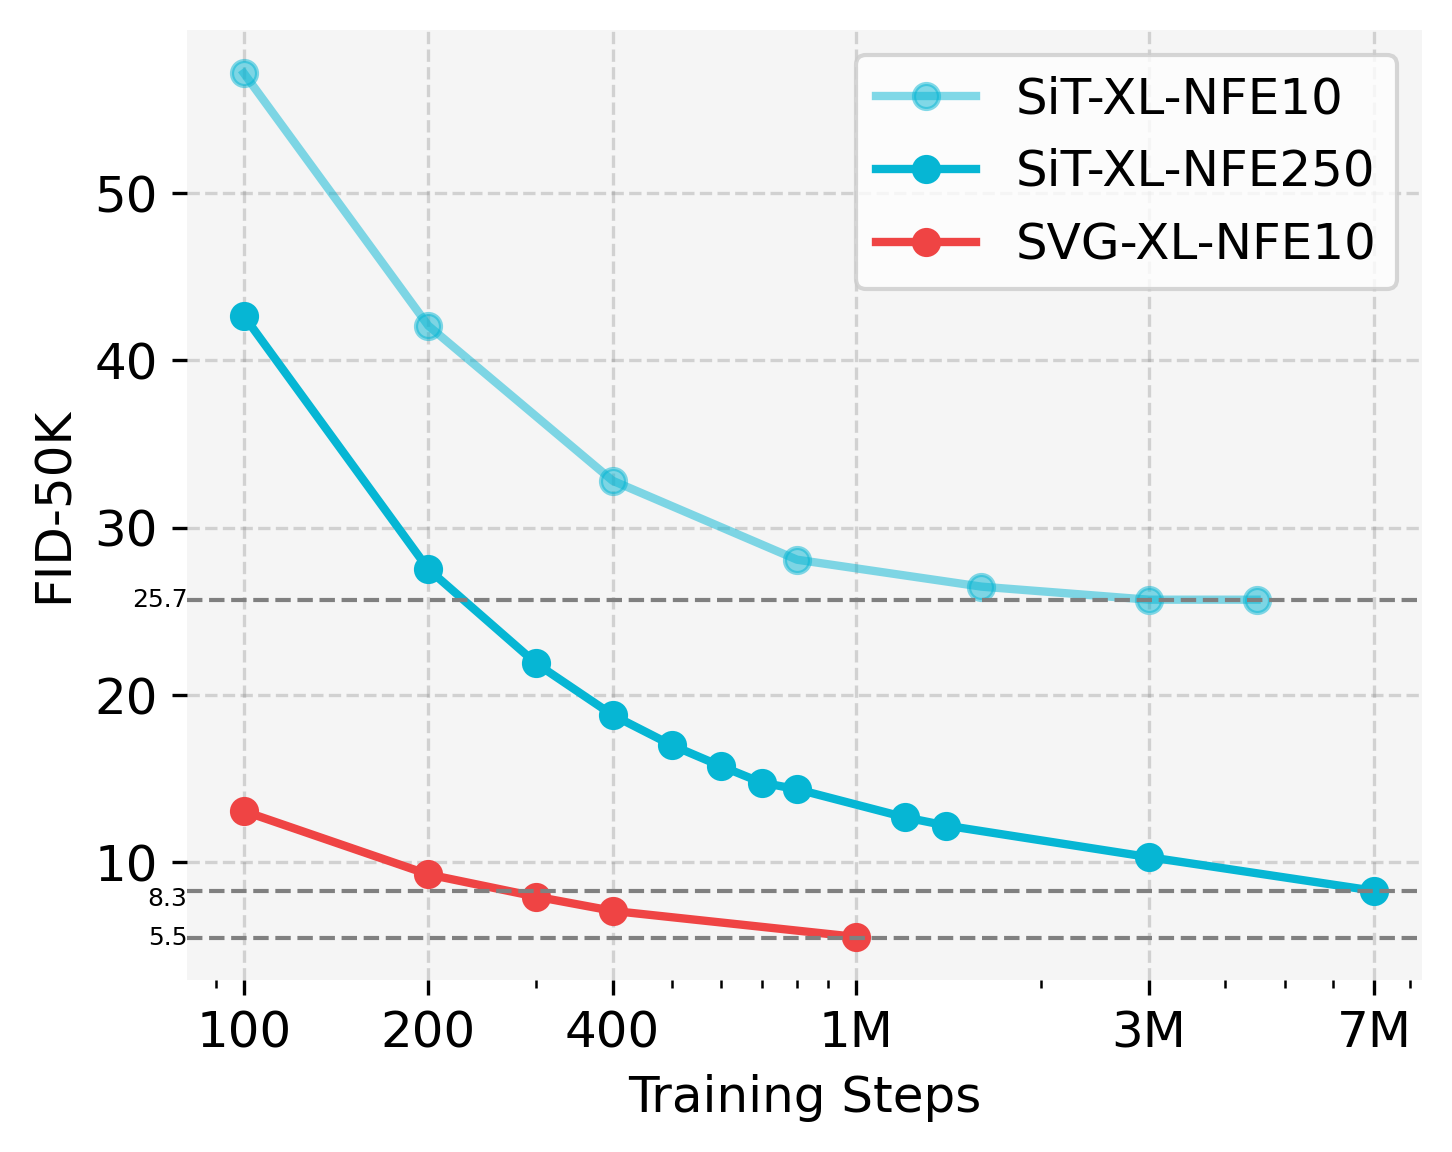

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# ---------- 颜色表 ----------
colors = ["#354e97", "#70a3c4", "#c7e5ec", "#f5b46f", "#df5b3f"]


def plot_fid_vs_steps(steps_list, fid_values_list, labels,
                      marker='o', save_path='fid_vs_step.png',
                      plot_name='FID vs Training Step', 
                      size=(5,3), is_ax_inset=False,
                      xscale='log',
                      xticks_k=[1,2,3,5,8,10,20,50,100,250],
                      y_offset=None,
                      x_offset=None,
                      highlight_points=None,  # 新增参数
                      xlabel="",
                      ylabel='FID',
                      colors=colors,
                      ):
    """
    highlight_points: list of floats, y 值（FID），会在 y 轴标注并画虚线
    """
    plt.rcParams['font.family'] = 'DejaVu Sans'
    # plt.rcParams['font.family'] = 'SimHei'
    plt.rcParams['font.size'] = 12
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['legend.fontsize'] = 12
    plt.rcParams['figure.dpi'] = 300

    fig, ax = plt.subplots(figsize=size)

    # 画主图
    for i, (x, y, lab) in enumerate(zip(steps_list, fid_values_list, labels)):
        ax.plot(x, y, marker=marker, lw=2, label=lab,
                color=colors[i % len(colors)])

    # 坐标轴
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(plot_name, fontsize=12)
    ax.set_xscale(xscale)
    ax.set_xticks(xticks_k)
    ax.set_xticklabels([f'{int(v/1000)}M' if v>=1000 else f'{int(v)}'
                        for v in xticks_k])
    
    # 设置x轴范围
    x_min = min([min(x) for x in steps_list])
    x_max = max([max(x) for x in steps_list])
    padding_factor = 0.2
    x_range = x_max - x_min
    ax.set_xlim(x_min - x_range * padding_factor, x_max + x_range * padding_factor)

    # 外观
    ax.set_facecolor('#f5f5f5')
    ax.grid(True, ls='--', alpha=0.3, c='gray')
    for sp in ax.spines.values():
        sp.set_visible(False)
    ax.legend(loc='best')

    # ---------- 画 highlight points ----------
    if highlight_points is not None:
        # 给 y 轴留点空间
        # ax.set_yticks(sorted(list(ax.get_yticks()) + highlight_points))
        # ax.margins(y=0.05)  # 上下留白
        # ax.tick_params(axis="y", pad=35)  # 把 y 轴刻度文字往右推，避免和标注重叠

        for i, val in enumerate(highlight_points):
            # 在图里画虚线
            ax.axhline(y=val, xmin=0, xmax=1, ls="--", c="gray", lw=1)

            # 在 y 轴左外侧写文字（axes fraction 用 -0.05 左移）
            ax.text(x_offset[i], val+y_offset[i], f'{val:.1f}',
                    va='center', ha='right',
                    fontsize=6, color='black',
                    transform=ax.get_yaxis_transform())


    plt.tight_layout()
    # 添加transparent=True参数实现透明背景
    plt.savefig(save_path, dpi=300, transparent=True)
    plt.show()


# ---------- 数据格式化 ----------
def format_data(Data, steps, name='FID'):
    return {'Data': Data, 'DataSteps': steps, 'Name': name}

# ---------- 你的原始数据 ----------

Svg_XL_FIDs_NFE10_Raw = [13.06, 9.28, 7.95, 7.10, 5.54]
Svg_XL_NFE10_Steps   = [100, 200, 300, 400, 1000]

Svg_XL_FIDs_NFE50_Raw = [13.5, 9.23355196, 7.678222277, 6.768102316, 6.304753691, 5.844274356, 5.591318549, 5.295429378]
Svg_XL_NFE50_Steps   = [100, 200, 300, 400, 500, 600, 700, 800]


SiT_FIDs_NFE10_Raw = [57.17,42.08,32.81,28.09,26.48,25.7, 25.7]
SiT_NFE10_Steps = [100,200,400,800,1600,3000,4500]

SiT_FIDs_NFE250_Raw = [42.6699256, 27.53129435, 21.89157078, 18.80377009, 16.99634972, 15.76212191, 14.76930538, 14.37034148, 12.69398723, 12.20085527, 10.31443595, 8.3]
SiT_NFE250_Steps = [100, 200, 300, 400, 500, 600, 700, 800, 1200, 1400, 3000, 7000]




Svg_XL_FIDs_NFE10  = format_data(Svg_XL_FIDs_NFE10_Raw,
                                   Svg_XL_NFE10_Steps,
                                   'SVG-XL-NFE10')

Svg_XL_FIDs_NFE50  = format_data(Svg_XL_FIDs_NFE50_Raw,
                                   Svg_XL_NFE50_Steps,
                                   'SVG-XL-NFE50')

# Flow_DiT_Dense_XL_2_FIDs_NFE250 = format_data(Flow_DiT_Dense_XL_2_FIDs_NFE250_Raw,
                                    #    Flow_DiT_Dense_XL_2_NFE250_Steps,
                                    #    'SiT-XL/2')
SiT_FIDs_NFE10 = format_data(SiT_FIDs_NFE10_Raw,
                                       SiT_NFE10_Steps,
                                       'SiT-XL-NFE10')

SiT_FIDs_NFE250 = format_data(SiT_FIDs_NFE250_Raw,
                                       SiT_NFE250_Steps,
                                       'SiT-XL-NFE250')


# Flow_FIDList = [Flow_DiT_Dense_XL_2_FIDs_NFE250, Flow_DiT_Dense_XL_2_FIDs_NFE10, Fvg_XL_2_FIDs_NFE10, Svg_XL_2_FIDs_NFE10]
Flow_FIDList = [
                # Flow_DiT_Dense_XL_2_FIDs_NFE250, 
                SiT_FIDs_NFE10, 
                # Svg_XL_FIDs_NFE50,
                SiT_FIDs_NFE250,
                # Fvg_XL_2_FIDs_NFE10, 
                Svg_XL_FIDs_NFE10,
                ]
plot_fid_vs_steps(
    steps_list=[f['DataSteps'] for f in Flow_FIDList],
    fid_values_list=[f['Data'] for f in Flow_FIDList],
    labels=[f['Name'] for f in Flow_FIDList],
    save_path="NFE10",
    plot_name="",
    ylabel='FID-50K',
    xlabel='',
    size=(5,4),
    is_ax_inset=False,
    highlight_points=[5.5, 8.3, 25.7],   # 你要标注的 FID 值
    y_offset=[0, -0.5, 0],
    x_offset=[0, 0, 0],
    xticks_k=[100,200,400,1000,3000,7000],
    colors=[
        # "#70a3c4",  # 浅蓝色
        # "#354e9780",  # 深蓝色
        # "#354e97",  # 深蓝色
        # "#c7e5ec80",  # 浅蓝色
        # "#c7e5ec",  # 浅蓝色
        # "#f5b46f",  # 浅橙色
        # "#df5b3f"   # 红色
        "#06b6d480",  # 亮孔雀蓝（明快清晰）
        "#06b6d4",  # 亮孔雀蓝（明快清晰）
        # "#8b5cf680",  # 半透明亮紫罗兰（透明度50%，偏柔和）
        # "#8b5cf6",    # 不透明亮紫罗兰（原鲜明款，饱和度高）
        "#ef4444"     # 亮正红（强烈突出，保持不变）
]
)


/tmp/ipykernel_42724/2133529823.py:51: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(x_min - x_range * padding_factor, x_max + x_range * padding_factor)


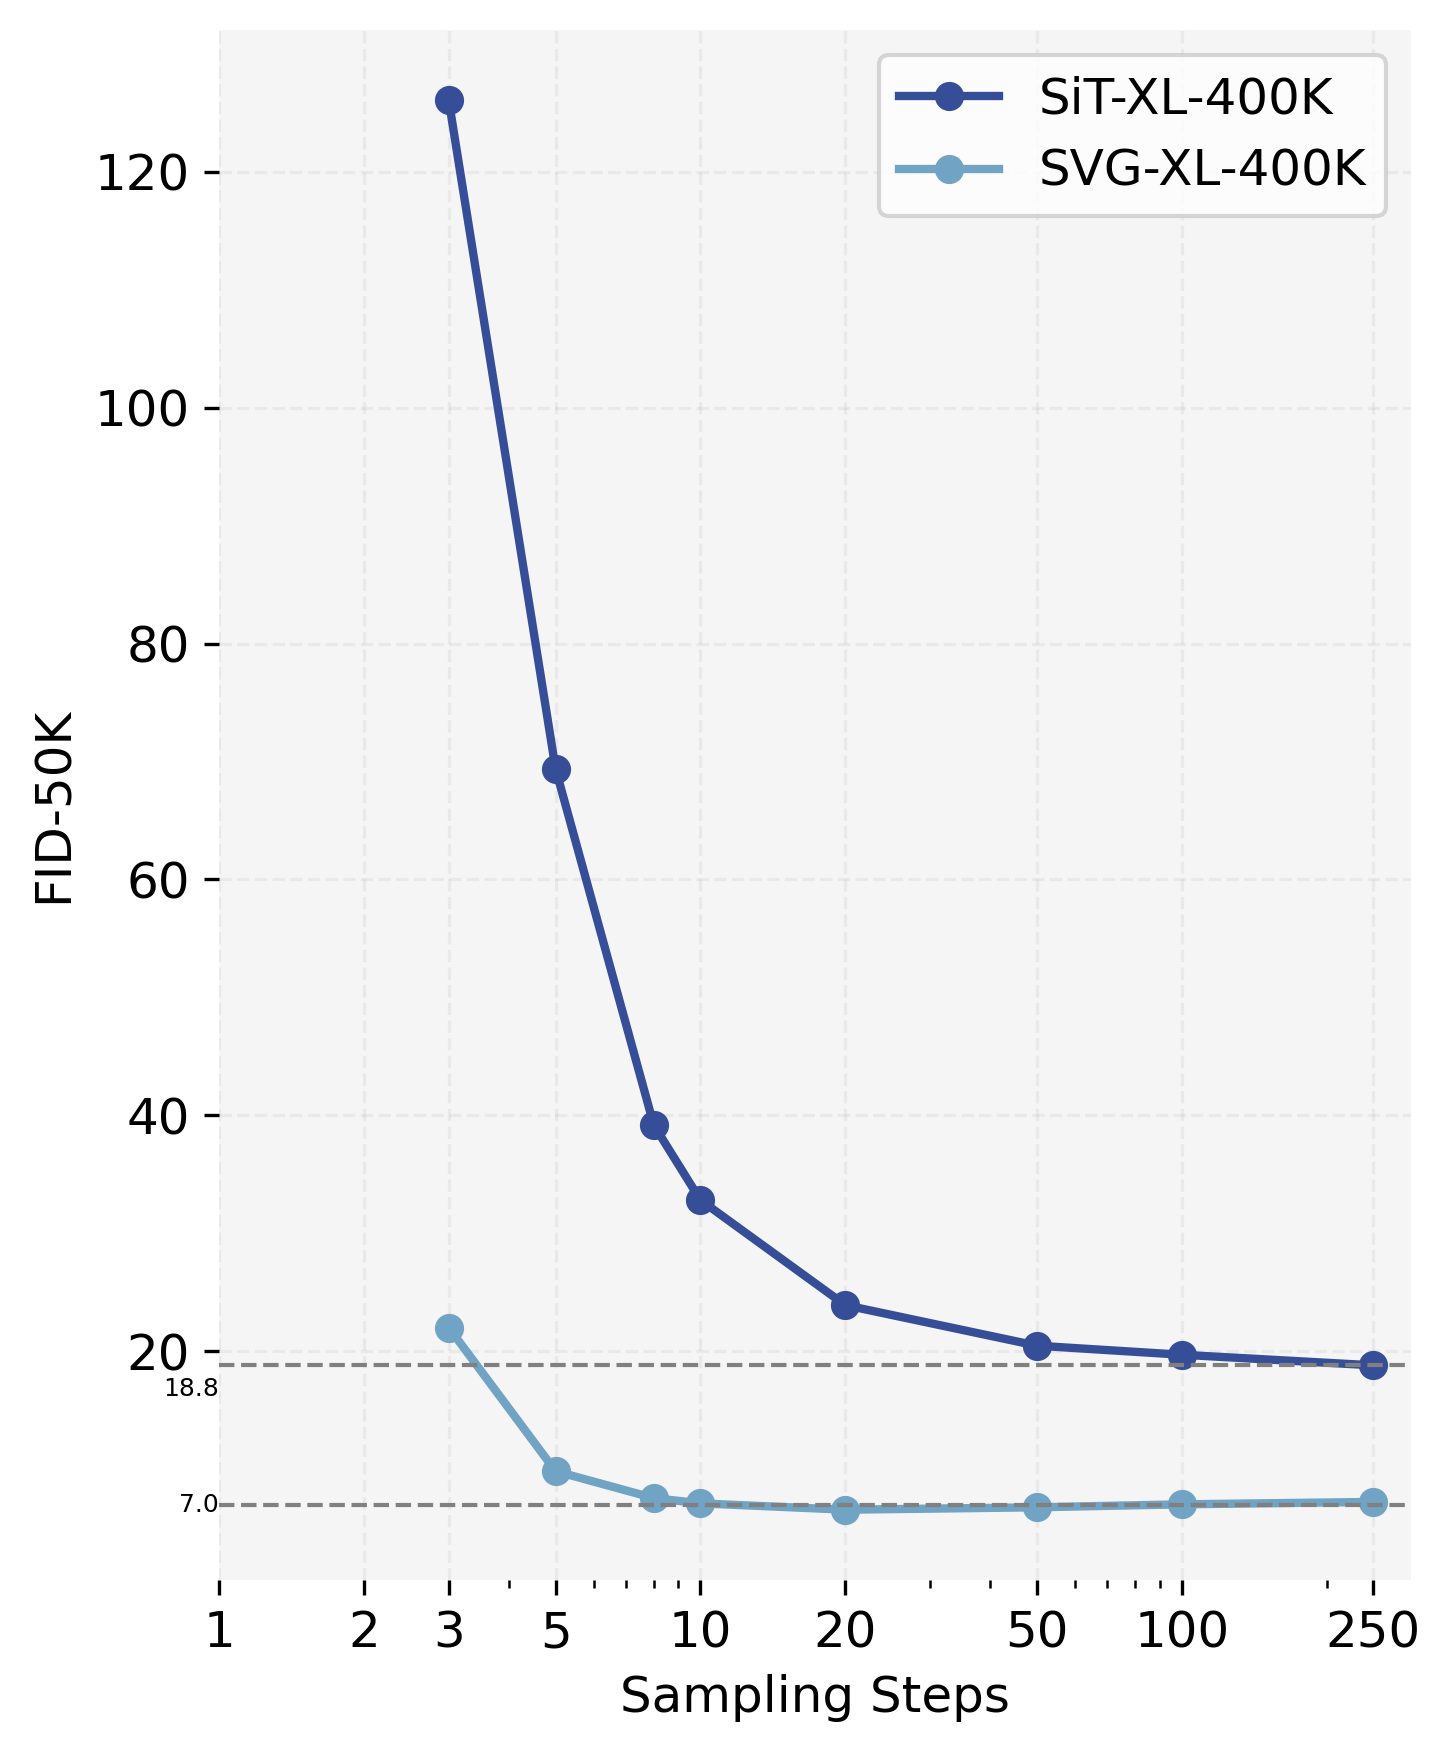

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# ---------- 颜色表 ----------
color_codes = ["#354e97", "#70a3c4", "#c7e5ec", "#f5b46f", "#df5b3f"]
colors = [
    # "#c7e5ec",  # 浅蓝色
    # "#f5b46f",  # 浅橙色

    "#354e97",  # 深蓝色
    # "#70a3c4",  # 浅蓝色
    "#df5b3f"   # 红色
]




# ---------- 数据格式化 ----------
def format_data(Data, steps, name='FID'):
    return {'Data': Data, 'DataSteps': steps, 'Name': name}

# ---------- 你的原始数据 ----------



Svg_XL_FIDs_400K_Raw = [22.00199941, 9.831458226, 7.551331533, 7.101180875, 6.565044918, 6.768102316, 7.020188299, 7.225091524]
Svg_XL_400K_Steps   = [3, 5, 8, 10, 20, 50, 100, 250]
Cfg_Svg_XL_FIDs_400K_Raw = [16.39737319, 7.769718308, 5.812777328, 5.317570478, 4.473694843, 4.23564975, 4.272362097, 4.326603826]
Cfg_Svg_XL_400K_Steps   = [3, 5, 8, 10, 20, 50, 100, 250]

SiT_XL_FIDs_400K_Raw = [126.0413137, 69.38124433, 39.16814568, 32.81396652, 23.90380891, 20.4698039810289, 19.7020503137742, 18.80377009]
SiT_XL_400K_Steps = [3, 5, 8, 10, 20, 50, 100, 250]
Cfg_SiT_XL_FIDs_400K_Raw = [85.85806514, 29.47543443, 13.18941092, 10.26071994, 6.509708233, 5.403095671, 5.170922116, 5.09602852]
Cfg_SiT_XL_400K_Steps = [3, 5, 8, 10, 20, 50, 100, 250]


Svg_XL_FIDs_400K  = format_data(Svg_XL_FIDs_400K_Raw,
                                Svg_XL_400K_Steps,
                                'SVG-XL-400K')

SiT_XL_FIDs_400K = format_data(SiT_XL_FIDs_400K_Raw,
                                    SiT_XL_400K_Steps,
                                    'SiT-XL-400K')


Cfg_Svg_XL_FIDs_400K  = format_data(Cfg_Svg_XL_FIDs_400K_Raw,
                                Cfg_Svg_XL_400K_Steps,
                                'SVG-XL-400K w/ CFG')

Cfg_SiT_XL_FIDs_400K = format_data(Cfg_SiT_XL_FIDs_400K_Raw,
                                    Cfg_SiT_XL_400K_Steps,
                                    'SiT-XL-400K w/ CFG')


Flow_FIDList = [
                SiT_XL_FIDs_400K,
                Svg_XL_FIDs_400K, 
                # Cfg_SiT_XL_FIDs_400K,
                # Cfg_Svg_XL_FIDs_400K,
                ]

plot_fid_vs_steps(
    steps_list=[f['DataSteps'] for f in Flow_FIDList],
    fid_values_list=[f['Data'] for f in Flow_FIDList],
    labels=[f['Name'] for f in Flow_FIDList],
    save_path="NFE-scale",
    plot_name="",
    ylabel='FID-50K',
    xlabel='Sampling Steps',
    size=(5,6),
    xticks_k=[1,2,3,5,10,20,50,100,250],
    is_ax_inset=False,
    highlight_points=[7.0, 18.8],   # 你要标注的 FID 值
    x_offset=[0, 0.0],
    y_offset=[0, -2]
)


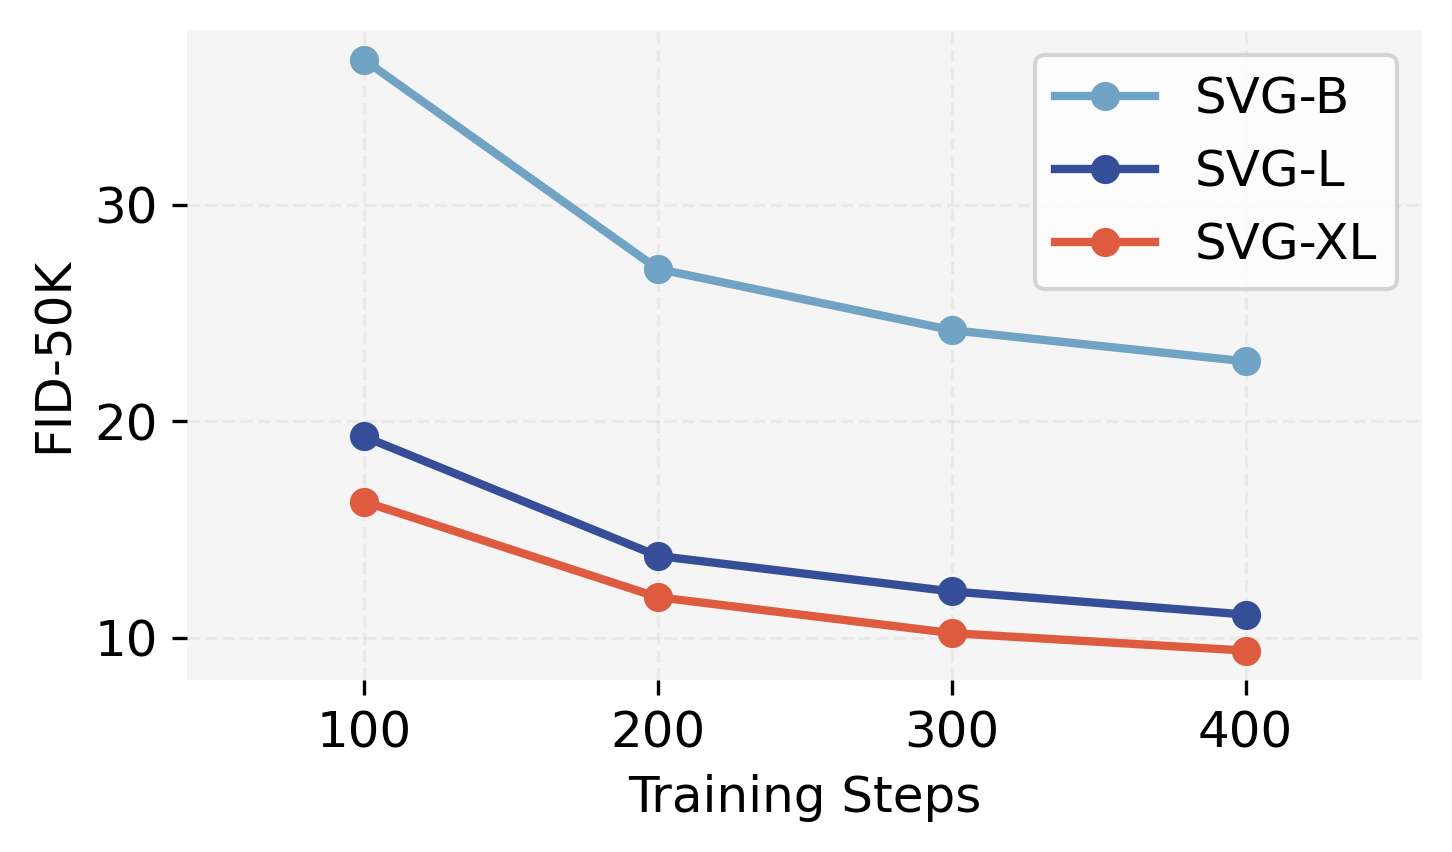

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# ---------- 颜色表 ----------
color_codes = ["#354e97", "#70a3c4", "#c7e5ec", "#f5b46f", "#df5b3f"]
colors = [
    # "#c7e5ec",  # 浅蓝色
    # "#f5b46f",  # 浅橙色
    "#70a3c4",  # 浅蓝色
    "#354e97",  # 深蓝色
    "#df5b3f"   # 红色
]


# ---------- 你的原始数据 ----------

# SiT-XL 数据
Svg_XL_FIDs_400K_Raw = [16.28696259, 11.86679491, 10.20764096, 9.398163342]
Svg_XL_400K_Steps   = [100, 200, 300, 400]

# SiT-L 数据
Svg_L_FIDs_400K_Raw = [19.29634158, 13.77630876, 12.13323783, 11.06490454]
Svg_L_400K_Steps   = [100, 200, 300, 400]

# SiT-B 数据
Svg_B_FIDs_400K_Raw = [36.71191116, 27.04108315, 24.20658813, 22.76475309]
Svg_B_400K_Steps   = [100, 200, 300, 400]


# 格式转换
Svg_XL_FIDs_400K  = format_data(Svg_XL_FIDs_400K_Raw,
                                Svg_XL_400K_Steps,
                                'SVG-XL')

Svg_L_FIDs_400K  = format_data(Svg_L_FIDs_400K_Raw,
                               Svg_L_400K_Steps,
                               'SVG-L')

Svg_B_FIDs_400K  = format_data(Svg_B_FIDs_400K_Raw,
                               Svg_B_400K_Steps,
                               'SVG-B')


# 整合到列表中
Flow_FIDList = [
    # B型号
    Svg_B_FIDs_400K,
    # L型号
    Svg_L_FIDs_400K,
    # XL型号
    Svg_XL_FIDs_400K,

    # 如需添加带CFG的配置，可以在这里继续添加
    # Cfg_SiT_XL_FIDs_400K,
    # Cfg_Svg_XL_FIDs_400K,
    # Cfg_SiT_L_FIDs_400K,
    # Cfg_Svg_L_FIDs_400K,
    # Cfg_SiT_B_FIDs_400K,
    # Cfg_Svg_B_FIDs_400K,
]

plot_fid_vs_steps(
    steps_list=[f['DataSteps'] for f in Flow_FIDList],
    fid_values_list=[f['Data'] for f in Flow_FIDList],
    labels=[f['Name'] for f in Flow_FIDList],
    save_path="Model_Scale",
    plot_name="",
    ylabel='FID-50K',
    xlabel='Training Steps',
    size=(5,3),
    xscale='linear',
    is_ax_inset=False,
    xticks_k=[100, 200, 300, 400],
    # highlight_points=[7.0, 18.8],   # 你要标注的 FID 值
    # y_offset=[0, -5],
    colors=colors
)
